In [1]:
import os
os.chdir("../")
%pwd

'c:\\Users\\karthikeya\\Fraud_Detection'

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_parquet('artifacts/train_data.parquet')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6271196,619,,386385.08,,4669568.85,5055953.92,C1977099364,,119649.98,0,0
1888243,164,CASH_IN,212458.78,C83569848,234635.0,447093.78,C1690589535,806037.88,593579.1,0,0
5549957,382,PAYMENT,19967.6,C852995095,3634.0,0.0,M1695416333,0.0,0.0,0,0
2025342,180,CASH_OUT,527616.51,C61761046,180216.0,0.0,C577654587,92157.1,619773.61,0,0
682342,36,TRANSFER,206067.85,C758004147,0.0,0.0,C2143015292,2131494.48,2337562.32,0,0


In [4]:
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest','isFraud', 'isFlaggedFraud']
discrete_columns = ['step','type']

In [5]:
for column in numerical_columns:
    df[column] = df[column].replace('', np.nan).astype(float)


In [6]:
df.isna().sum()

step                   0
type                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig    213457
nameDest               0
oldbalanceDest    163045
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6271196,619,,386385.08,,4669568.85,5055953.92,C1977099364,NaN,119649.98,0.0,0.0
3599993,263,PAYMENT,5292.90,C192639813,257.00,NaN,M1055957644,0.00,0.00,0.0,0.0
1429393,139,,5650.96,,0.00,0.00,M1756208398,NaN,0.00,0.0,0.0
2696603,211,TRANSFER,1166173.36,C1461753973,0.00,NaN,C1633373750,7563328.41,8729501.77,0.0,0.0
5554203,383,CASH_OUT,351.22,C1237102715,0.00,NaN,C1370603699,1001295.95,1001647.17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2795513,216,,326122.58,,0.00,0.00,C1350354405,NaN,1199862.46,0.0,0.0
5147581,357,PAYMENT,11221.57,C335512392,56127.00,NaN,M1714473611,0.00,0.00,0.0,0.0
3275709,251,CASH_OUT,266104.05,C968963698,11142.00,NaN,C1760225299,103740.54,369844.60,0.0,0.0
3344769,253,,153029.85,,0.00,0.00,C1385873548,NaN,2085289.46,0.0,0.0


In [7]:
fraud_trans_count = df['isFraud'].value_counts().iloc[1]
genuine_trans_count = df['isFraud'].value_counts().iloc[0]
ratio =fraud_trans_count/genuine_trans_count
print(f'Ratio of fraud to genuine transactios is :{ratio:.6f}')

Ratio of fraud to genuine transactios is :0.001297


- Ratio of fraud to genuine transactios is : 0.001297


In [8]:
df.groupby(['type'])['isFraud'].value_counts()

type      isFraud
          0.0         162815
          1.0            230
CASH_IN   0.0        1083737
CASH_OUT  0.0        1729849
          1.0           3208
DEBIT     0.0          32139
PAYMENT   0.0        1665536
TRANSFER  0.0         409427
          1.0           3155
Name: count, dtype: int64

In [9]:
df['type'] = df['type'].map(lambda x: x if x!='' else 'UNKNOWN')

In [10]:
df[['type','isFraud']].groupby(['type']).value_counts()

type      isFraud
CASH_IN   0.0        1083737
CASH_OUT  0.0        1729849
          1.0           3208
DEBIT     0.0          32139
PAYMENT   0.0        1665536
TRANSFER  0.0         409427
          1.0           3155
UNKNOWN   0.0         162815
          1.0            230
Name: count, dtype: int64

###  
- Out of all types, CASHOUT, TRANSFER type transactions have highest fraud transcations.
- CASH_IN, DEBIT and PAYMENT transactions do not have any fraudlent transactions.

In [35]:
df = df[~df.type.isin(['CASH_IN','DEBIT', 'PAYMENT'])]

In [10]:
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090096 entries, 0 to 5090095
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            object 
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), object(4)
memory usage: 427.2+ MB


In [11]:
df['errorbalanceOrig'] = df.newbalanceOrig + df.amount - df.oldbalanceOrg
df['errorbalanceDest'] = df.oldbalanceDest + df.amount - df.newbalanceDest

In [12]:
df['step'] = df['step'].astype('int')

In [39]:
fraud = df[df['isFraud']==1]

nonfraud = df[df['isFraud']==0]

In [40]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(fraud['amount'], nonfraud['amount'])
print(f"Mann-Whitney U Test - P-value: {p}")


Mann-Whitney U Test - P-value: 0.0


In [30]:
import numpy as np

# Define observed groups
fraud_amounts = fraud['amount'].values
nonfraud_amounts = nonfraud['amount'].values

# Calculate the observed difference in means
observed_diff = np.mean(fraud_amounts) - np.mean(nonfraud_amounts)

# Combine both groups into a single array
combined = np.concatenate([fraud_amounts, nonfraud_amounts])

# Set number of permutations
n_permutations = 10000
permutation_diffs = []

# Perform permutations
for _ in range(n_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined)
    
    # Split into two new groups of the same sizes as the original groups
    perm_fraud = combined[:len(fraud_amounts)]
    perm_nonfraud = combined[len(fraud_amounts):]
    
    # Compute the difference in means for this permutation
    perm_diff = np.mean(perm_fraud) - np.mean(perm_nonfraud)
    permutation_diffs.append(perm_diff)

# Calculate the p-value
permutation_diffs = np.array(permutation_diffs)
p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))

# Print results
print(f"Observed Difference in Means: {observed_diff}")
print(f"P-value from Permutation Test: {p_value}")


KeyboardInterrupt: 

In [41]:
import numpy as np

# Assuming fraud and nonfraud are your dataframes and 'amount' is the column of interest

# Group 1: Fraudulent transactions
fraud_amounts = fraud['amount']

# Group 2: Non-fraudulent transactions
nonfraud_amounts = nonfraud['amount']

# Means of the two groups
mean_fraud = np.mean(fraud_amounts)
mean_nonfraud = np.mean(nonfraud_amounts)

# Standard deviations of the two groups
std_fraud = np.std(fraud_amounts, ddof=1)
std_nonfraud = np.std(nonfraud_amounts, ddof=1)

# Sample sizes
n_fraud = len(fraud_amounts)
n_nonfraud = len(nonfraud_amounts)

# Pooled standard deviation
pooled_std = np.sqrt(((n_fraud - 1) * std_fraud**2 + (n_nonfraud - 1) * std_nonfraud**2) / (n_fraud + n_nonfraud - 2))

# Cohen's d
cohen_d = (mean_fraud - mean_nonfraud) / pooled_std

print(f"Cohen's d: {cohen_d}")


Cohen's d: 1.3705766740996521


In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'errorbalanceOrig', 'errorbalanceDest'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090096 entries, 0 to 5090095
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int32  
 1   type              object 
 2   amount            float64
 3   nameOrig          object 
 4   oldbalanceOrg     float64
 5   newbalanceOrig    float64
 6   nameDest          object 
 7   oldbalanceDest    float64
 8   newbalanceDest    float64
 9   isFraud           float64
 10  isFlaggedFraud    float64
 11  errorbalanceOrig  float64
 12  errorbalanceDest  float64
dtypes: float64(9), int32(1), object(3)
memory usage: 485.4+ MB


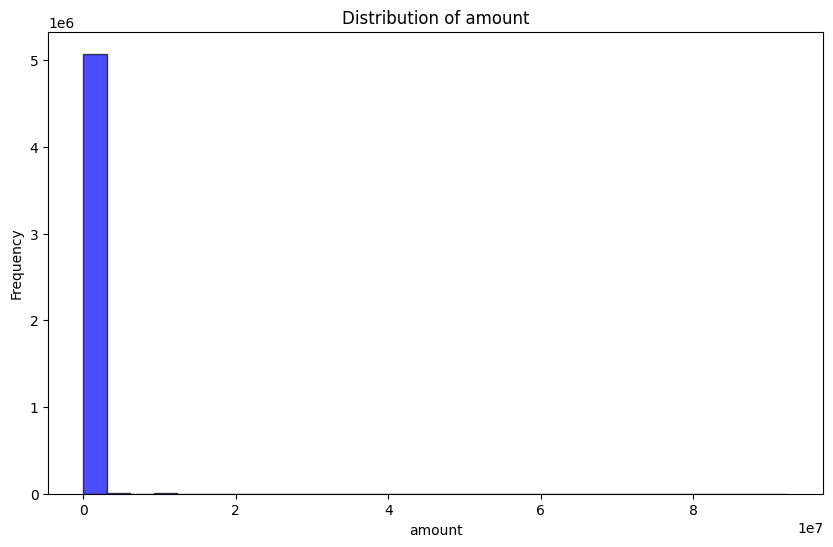

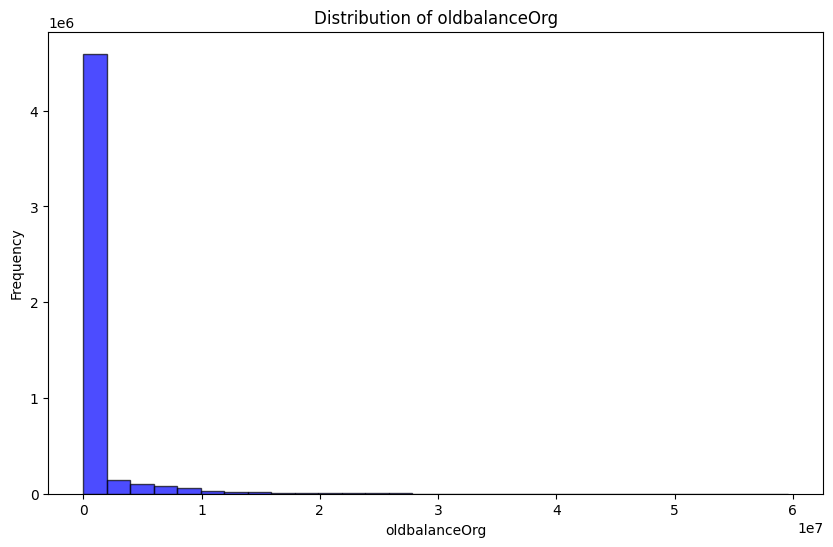

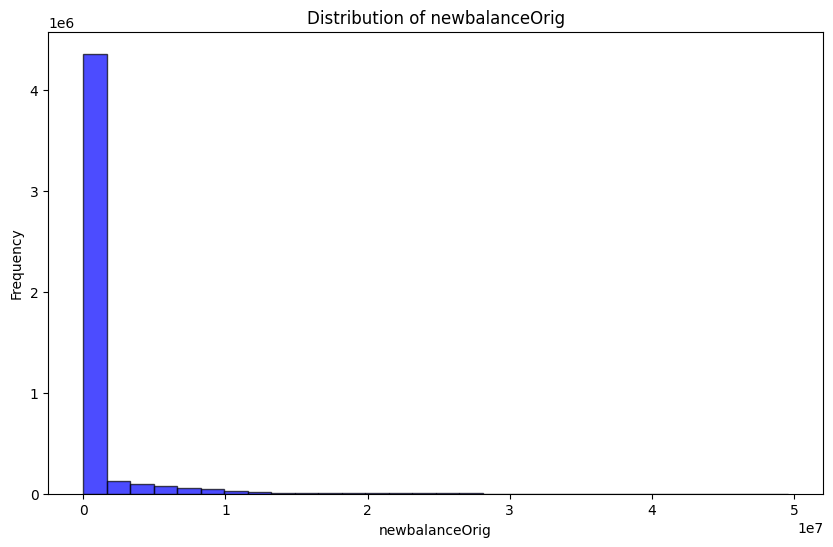

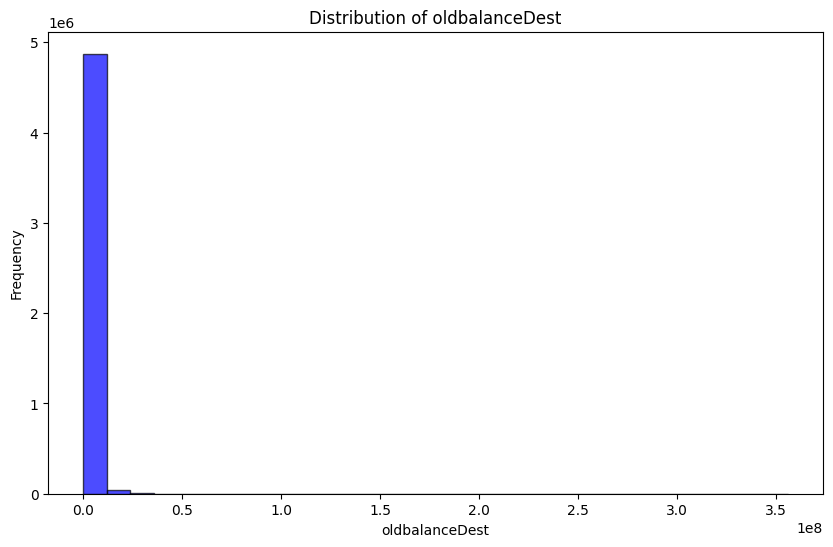

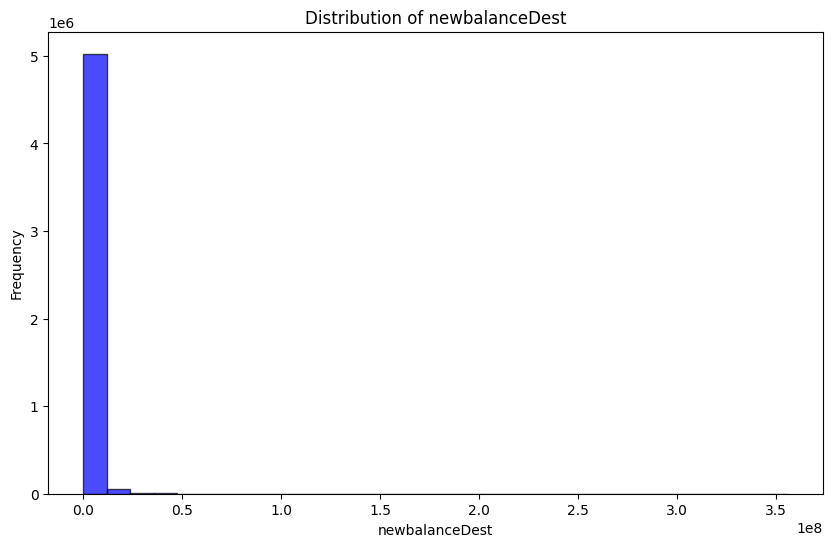

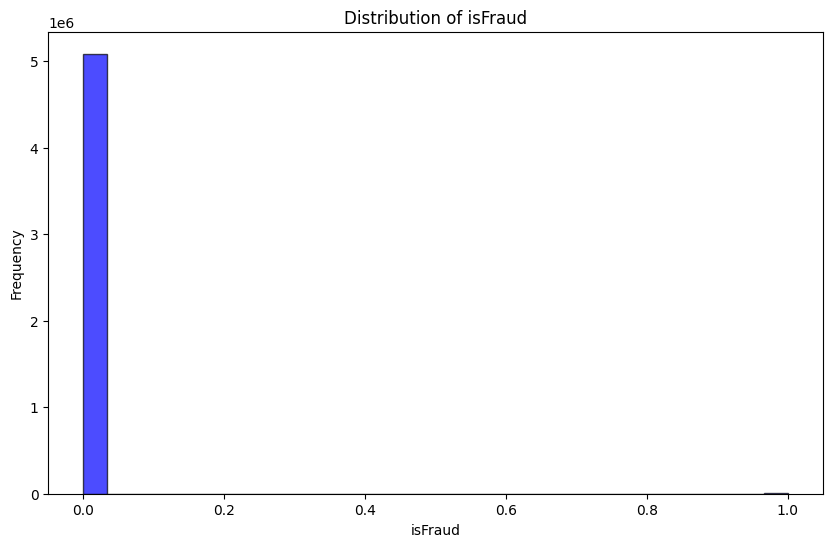

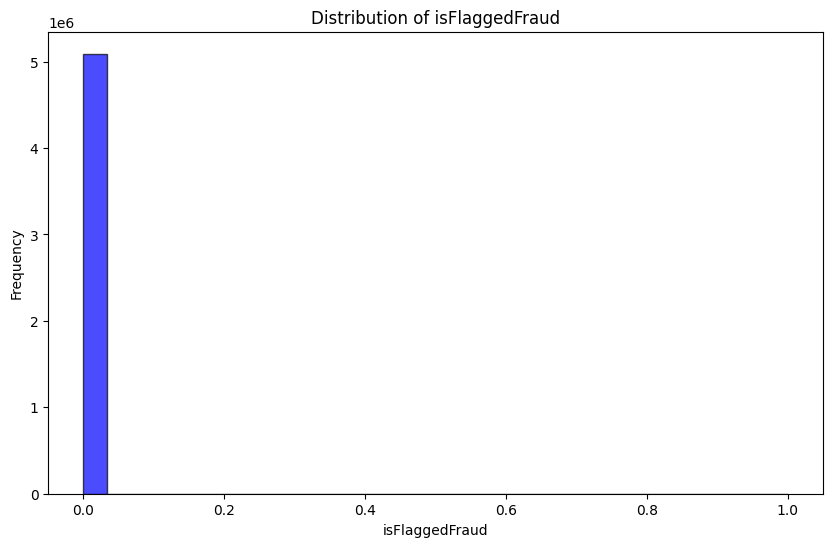

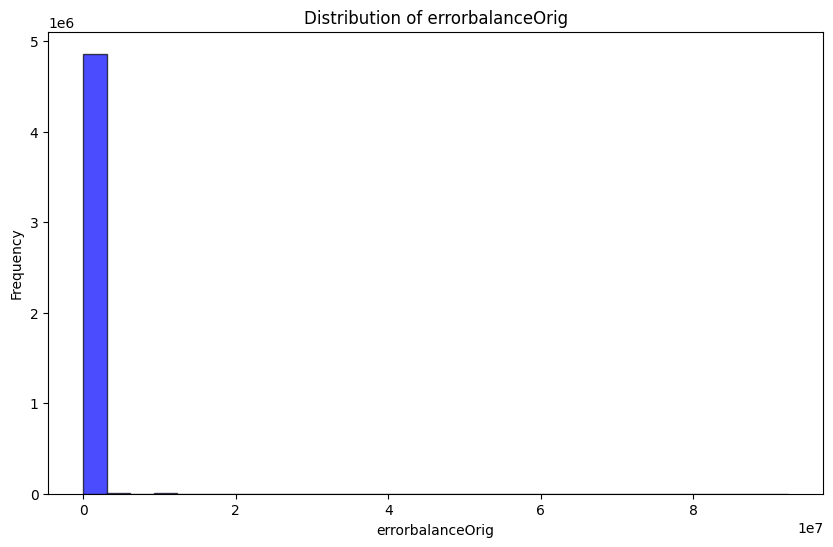

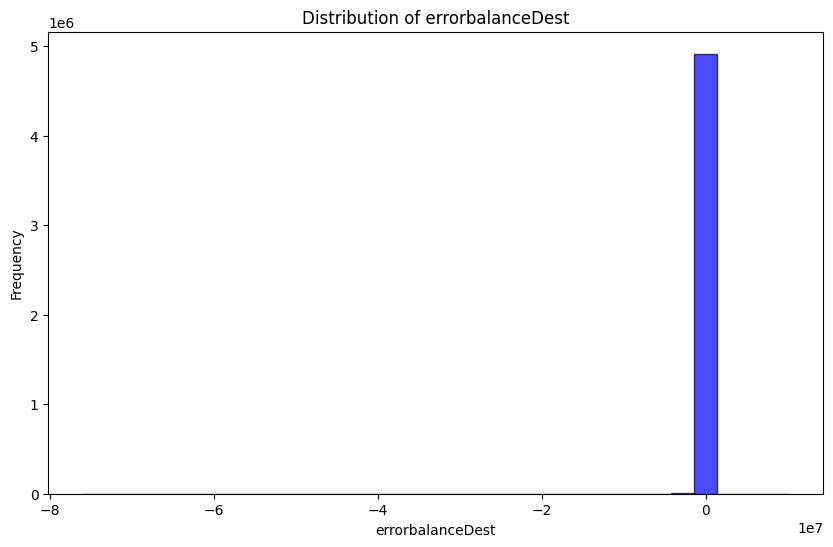

In [23]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(exclude='object').columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [24]:
import seaborn as sns

# Boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


KeyboardInterrupt: 

<Figure size 1200x600 with 0 Axes>

In [15]:
continuous_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'errorbalanceOrig',
       'errorbalanceDest']

In [65]:
y=df[df['isFraud']==1]['isFraud'].isna()

In [66]:
y.shape

(6593,)

In [82]:
X = df.dropna()
X_n = X[X['isFraud']==0][continuous_columns]
X_f = X[X['isFraud']==1][continuous_columns]
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform non-fraudulent data
X_n_normalized = scaler.fit_transform(X_n)

# Transform fraudulent data using the same scaler
X_f_normalized = scaler.transform(X_f)

# Convert back to a DataFrame (optional, for better readability)
X_n_normalized = pd.DataFrame(X_n_normalized, columns=X_n.columns, index=X_n.index)
X_f_normalized = pd.DataFrame(X_f_normalized, columns=X_f.columns, index=X_f.index)

# print("Non-fraudulent normalized data:")
# print(X_n_normalized.head())

# print("Fraudulent normalized data:")
# print(X_f_normalized.head())


In [83]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Define the Attention Mechanism
class FeatureAttention(nn.Module):
    def __init__(self, input_dim):
        super(FeatureAttention, self).__init__()
        self.attention = nn.Linear(input_dim, input_dim)  # Learnable weights for attention
        self.softmax = nn.Softmax(dim=1)  # Normalize across features

    def forward(self, x):
        attention_scores = self.softmax(self.attention(x))  # Compute attention scores
        attended_x = x * attention_scores  # Scale input by attention scores
        return attended_x, attention_scores

# Define the Autoencoder with Attention
class AttentionAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(AttentionAutoencoder, self).__init__()
        self.input_dim = input_dim

        # Attention mechanism
        self.attention = FeatureAttention(input_dim)

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()  # Use Sigmoid if inputs are normalized to [0, 1]
        )

    def forward(self, x):
        # Apply attention mechanism
        attended_x, attention_scores = self.attention(x)

        # Encode and Decode
        encoded = self.encoder(attended_x)
        reconstructed = self.decoder(encoded)

        return reconstructed, attention_scores  # Return reconstructed input and attention weights

# Example Training Loop
def train_autoencoder(autoencoder, dataloader, epochs=5, learning_rate=1e-3):
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()  # Reconstruction error

    autoencoder.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for batch in dataloader:
            inputs = batch[0]  # Data from DataLoader is already on the CPU
            optimizer.zero_grad()

            # Forward pass
            outputs, attention_scores = autoencoder(inputs)

            # Compute loss
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(dataloader):.6f}")


input_dim = X_n_normalized.shape[1]  # Number of features
dataset = TensorDataset(torch.tensor(X_n_normalized.values, dtype=torch.float32))

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8)  # Use 8 CPU cores

# Initialize and Train the Autoencoder on CPU
feature_attention_autoencoder = AttentionAutoencoder(input_dim=input_dim)
train_autoencoder(feature_attention_autoencoder, dataloader, epochs=5)


Epoch [1/5], Loss: 0.000605
Epoch [2/5], Loss: 0.000015
Epoch [3/5], Loss: 0.000012
Epoch [4/5], Loss: 0.000011
Epoch [5/5], Loss: 0.000010


In [88]:
# Initialize the model
# feature_attention_autoencoder = AttentionAutoencoder(input_dim=input_dim)

# Calculate model size in parameters
model_size = sum(p.numel() for p in feature_attention_autoencoder.parameters())  # Total number of parameters
print(f"Model size: {model_size} parameters")


Model size: 632 parameters


In [89]:
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score
import pandas as pd  # Ensure pandas is imported

# Function to calculate reconstruction loss for each data point
def calculate_reconstruction_loss_per_point(autoencoder, data):
    autoencoder.eval()  # Set model to evaluation mode
    data = torch.tensor(data.values, dtype=torch.float32)  # Convert data to tensor and ensure it's on CPU

    # Forward pass to get the reconstruction
    with torch.no_grad():  # No need to compute gradients for evaluation
        output = autoencoder(data)  # Ensure model and data are on the same device (CPU)
        # Handle cases where autoencoder returns multiple outputs (e.g., with attention scores)
        reconstructed = output[0] if isinstance(output, tuple) else output

    # Calculate the per-point reconstruction loss
    reconstruction_losses = F.mse_loss(reconstructed, data, reduction='none')  # Keep loss per data point
    reconstruction_losses = reconstruction_losses.mean(dim=1)  # Average over features for each data point

    return reconstruction_losses.numpy()  # Convert to numpy array for further processing

# Step 1: Calculate reconstruction loss for non-fraudulent data (X_n_normalized)
non_fraud_losses = calculate_reconstruction_loss_per_point(feature_attention_autoencoder, X_n_normalized)

# Step 2: Determine anomaly threshold using non-fraudulent data (e.g., 95th percentile)
threshold = np.percentile(non_fraud_losses, 99)  # 95% threshold
print(f"Anomaly Threshold: {threshold:.6f}")

# Step 3: Calculate reconstruction loss for fraudulent data (X_f_normalized)
fraud_losses = calculate_reconstruction_loss_per_point(feature_attention_autoencoder, X_f_normalized)
print("Reconstruction Loss for Fraudulent Data Points:")
print(fraud_losses)

# Step 4: Classify fraudulent and non-fraudulent data based on the threshold
# Combine X_n_normalized and X_f_normalized for predictions using pd.concat
all_data = pd.concat([X_n_normalized, X_f_normalized], axis=0)  # Concatenate data along rows (axis=0)
all_losses = calculate_reconstruction_loss_per_point(feature_attention_autoencoder, all_data)

# Predict anomalies (True if reconstruction loss exceeds threshold)
predicted_anomalies = all_losses > threshold

# Step 5: Generate ground truth labels for combined data
# Non-fraudulent data (X_n_normalized) has label 0, Fraudulent data (X_f_normalized) has label 1
true_labels = np.concatenate([np.zeros(len(X_n_normalized)), np.ones(len(X_f_normalized))])

# Step 6: Calculate F1-score
f1 = f1_score(true_labels, predicted_anomalies)
precision = precision_score(true_labels, predicted_anomalies)
recall = recall_score(true_labels, predicted_anomalies)
print(f"F1-Score: {f1:.6f}")
print(f"precision: {precision:.6f}")
print(f"recall: {recall:.6f}")



Anomaly Threshold: 0.000054
Reconstruction Loss for Fraudulent Data Points:
[3.4217339e-04 8.4352050e-06 1.4093400e-06 ... 1.7983959e-05 3.3805841e-06
 6.9579808e-05]
F1-Score: 0.174662
precision: 0.110460
recall: 0.417076


In [47]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import os

class VanillaAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(VanillaAutoencoder, self).__init__()
        self.input_dim = input_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()  # Use Sigmoid if inputs are normalized to [0, 1]
        )

    def forward(self, x):
        # Encode and Decode
        encoded = self.encoder(x)
        reconstructed = self.decoder(encoded)
        return reconstructed


# Training function
def train_vanilla_autoencoder(autoencoder, dataloader, epochs=5, learning_rate=1e-3):
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()  # Reconstruction error

    autoencoder.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for batch in dataloader:
            inputs = batch[0]  # Use data from DataLoader
            optimizer.zero_grad()

            # Forward pass
            outputs = autoencoder(inputs)

            # Compute loss
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(dataloader):.6f}")


# Example usage
# Assuming `X_n_normalized` is your normalized dataset (as a pandas DataFrame)
# Convert DataFrame to TensorDataset
input_dim = X_n_normalized.shape[1]  # Number of features
dataset = TensorDataset(torch.tensor(X_n_normalized.values, dtype=torch.float32))

# Use 8 CPU cores for DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=8)

# Initialize and train the Vanilla Autoencoder
device = torch.device("cpu")  # Ensure CPU usage
vanilla_autoencoder = VanillaAutoencoder(input_dim=input_dim).to(device)
train_vanilla_autoencoder(vanilla_autoencoder, dataloader, epochs=5)


Epoch [1/5], Loss: 0.000203
Epoch [2/5], Loss: 0.000008
Epoch [3/5], Loss: 0.000006
Epoch [4/5], Loss: 0.000005
Epoch [5/5], Loss: 0.000005


In [49]:
import torch.nn.functional as F

# Function to calculate reconstruction loss for fraudulent data
def calculate_reconstruction_loss(autoencoder, data):
    autoencoder.eval()  # Set model to evaluation mode
    data = torch.tensor(data.values, dtype=torch.float32)  # Convert data to tensor and ensure it's on CPU
    
    # Forward pass to get the reconstruction
    with torch.no_grad():  # No need to compute gradients for evaluation
        output = autoencoder(data)  # Ensure model and data are on the same device (CPU)
        # Handle cases where autoencoder returns multiple outputs (e.g., with attention scores)
        reconstructed = output[0] if isinstance(output, tuple) else output
    
    # Calculate the reconstruction loss (MSE between input and reconstructed output)
    loss = F.mse_loss(reconstructed, data)
    return loss.item()

# Assuming you have your fraudulent data normalized (X_f_normalized)
# Calculate reconstruction loss for fraudulent data
fraud_loss = calculate_reconstruction_loss(vanilla_autoencoder, X_f_normalized)
print(f"Reconstruction Loss for vanilla_autoencoder for Fraudulent Data: {fraud_loss:.6f}")


Reconstruction Loss for vanilla_autoencoder for Fraudulent Data: 0.001107


In [90]:
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import f1_score
import pandas as pd  # Ensure pandas is imported

# Function to calculate reconstruction loss for each data point
def calculate_reconstruction_loss_per_point(autoencoder, data):
    autoencoder.eval()  # Set model to evaluation mode
    data = torch.tensor(data.values, dtype=torch.float32)  # Convert data to tensor and ensure it's on CPU

    # Forward pass to get the reconstruction
    with torch.no_grad():  # No need to compute gradients for evaluation
        output = autoencoder(data)  # Ensure model and data are on the same device (CPU)
        # Handle cases where autoencoder returns multiple outputs (e.g., with attention scores)
        reconstructed = output[0] if isinstance(output, tuple) else output

    # Calculate the per-point reconstruction loss
    reconstruction_losses = F.mse_loss(reconstructed, data, reduction='none')  # Keep loss per data point
    reconstruction_losses = reconstruction_losses.mean(dim=1)  # Average over features for each data point

    return reconstruction_losses.numpy()  # Convert to numpy array for further processing

# Step 1: Calculate reconstruction loss for non-fraudulent data (X_n_normalized)
non_fraud_losses = calculate_reconstruction_loss_per_point(vanilla_autoencoder, X_n_normalized)

# Step 2: Determine anomaly threshold using non-fraudulent data (e.g., 95th percentile)
threshold = np.percentile(non_fraud_losses, 99)  # 95% threshold
print(f"Anomaly Threshold: {threshold:.6f}")

# Step 3: Calculate reconstruction loss for fraudulent data (X_f_normalized)
fraud_losses = calculate_reconstruction_loss_per_point(vanilla_autoencoder, X_f_normalized)
print("Reconstruction Loss for Fraudulent Data Points:")
print(fraud_losses)

# Step 4: Classify fraudulent and non-fraudulent data based on the threshold
# Combine X_n_normalized and X_f_normalized for predictions using pd.concat
all_data = pd.concat([X_n_normalized, X_f_normalized], axis=0)  # Concatenate data along rows (axis=0)
all_losses = calculate_reconstruction_loss_per_point(vanilla_autoencoder, all_data)

# Predict anomalies (True if reconstruction loss exceeds threshold)
predicted_anomalies = all_losses > threshold

# Step 5: Generate ground truth labels for combined data
# Non-fraudulent data (X_n_normalized) has label 0, Fraudulent data (X_f_normalized) has label 1
true_labels = np.concatenate([np.zeros(len(X_n_normalized)), np.ones(len(X_f_normalized))])

# Step 6: Calculate F1-score
# Step 6: Calculate F1-score
f1 = f1_score(true_labels, predicted_anomalies)
precision = precision_score(true_labels, predicted_anomalies)
recall = recall_score(true_labels, predicted_anomalies)
print(f"F1-Score: {f1:.6f}")
print(f"precision: {precision:.6f}")
print(f"recall: {recall:.6f}")



Anomaly Threshold: 0.000030
Reconstruction Loss for Fraudulent Data Points:
[1.9279000e-04 3.0472347e-06 1.6534193e-06 ... 1.1389486e-05 4.4917124e-07
 7.2742252e-05]
F1-Score: 0.176539
precision: 0.111617
recall: 0.421993


In [16]:
continuous_columns

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'errorbalanceOrig',
 'errorbalanceDest']

In [17]:
df_copy= df[continuous_columns+ ['isFraud']]
# df_copy.drop('step',axis=1, inplace=True)
df_copy = df_copy.dropna(axis=0)
df_copy.reset_index(drop=True, inplace=True)
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

In [18]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorbalanceOrig,errorbalanceDest
0,212458.78,234635.00,447093.78,806037.88,593579.10,424917.56,4.249176e+05
1,19967.60,3634.00,0.00,0.00,0.00,16333.60,1.996760e+04
2,527616.51,180216.00,0.00,92157.10,619773.61,347400.51,0.000000e+00
3,206067.85,0.00,0.00,2131494.48,2337562.32,206067.85,1.000000e-02
4,141.42,174.00,32.58,0.00,0.00,0.00,1.414200e+02
...,...,...,...,...,...,...,...
4720453,129715.85,5054252.83,5183968.68,246692.94,116977.09,259431.70,2.594317e+05
4720454,2459.70,0.00,0.00,0.00,0.00,2459.70,2.459700e+03
4720455,10579.16,59279.00,48699.84,322754.16,333333.32,0.00,-5.820766e-11
4720456,73020.76,20289.00,0.00,256102.84,329123.61,52731.76,-1.000000e-02


In [19]:
y.value_counts()

isFraud
0.0    4714356
1.0       6102
Name: count, dtype: int64

In [24]:
X.drop(columns = ['errorbalanceOrig', 'errorbalanceDest'], inplace=True)

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure no leakage during preprocessing by fitting only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test data

# Define the classifier
rf_classifier = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=8
)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(20, 101, 20),  # Number of trees in the forest
    'max_depth': np.arange(1, 6, 1),        # Maximum depth of each tree
    'min_samples_split': np.arange(20, 101, 20),        # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(20, 101, 20),          # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'], # Number of features to consider for best split
    'ccp_alpha': np.logspace(-4, 0, 20),    # Complexity parameter for Minimal Cost-Complexity Pruning
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    scoring='f1',  # Scoring metric to optimize
    cv=5,         # Number of cross-validation folds
    random_state=42,  # For reproducibility
    n_jobs=-1,    # Use all available cores
    verbose=3     # For detailed output during fitting
)

# Perform the search
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found:", random_search.best_params_)
print("Best F1-Score:", random_search.best_score_)

cv_results = random_search.cv_results_

for mean_score, std_score, params in zip(cv_results['mean_test_score'], 
                                         cv_results['std_test_score'], 
                                         cv_results['params']):
    print(f"Mean F1-Score: {mean_score:.4f} | Std: {std_score:.4f} | Params: {params}")


# Step 4: Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")


# Optional: Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'n_estimators': 20, 'min_samples_split': 60, 'min_samples_leaf': 100, 'max_features': 'sqrt', 'max_depth': 4, 'ccp_alpha': 0.0001}
Best F1-Score: 0.9947886996242989
Mean F1-Score: 0.0021 | Std: 0.0010 | Params: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 40, 'max_features': 'log2', 'max_depth': 5, 'ccp_alpha': 0.615848211066026}
Mean F1-Score: 0.9479 | Std: 0.0528 | Params: {'n_estimators': 20, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 'sqrt', 'max_depth': 4, 'ccp_alpha': 0.03359818286283781}
Mean F1-Score: 0.9948 | Std: 0.0032 | Params: {'n_estimators': 20, 'min_samples_split': 60, 'min_samples_leaf': 100, 'max_features': 'sqrt', 'max_depth': 4, 'ccp_alpha': 0.0001}
Mean F1-Score: 0.9237 | Std: 0.0366 | Params: {'n_estimators': 20, 'min_samples_split': 80, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 2, 'ccp_alpha': 0.0006951927961775605}


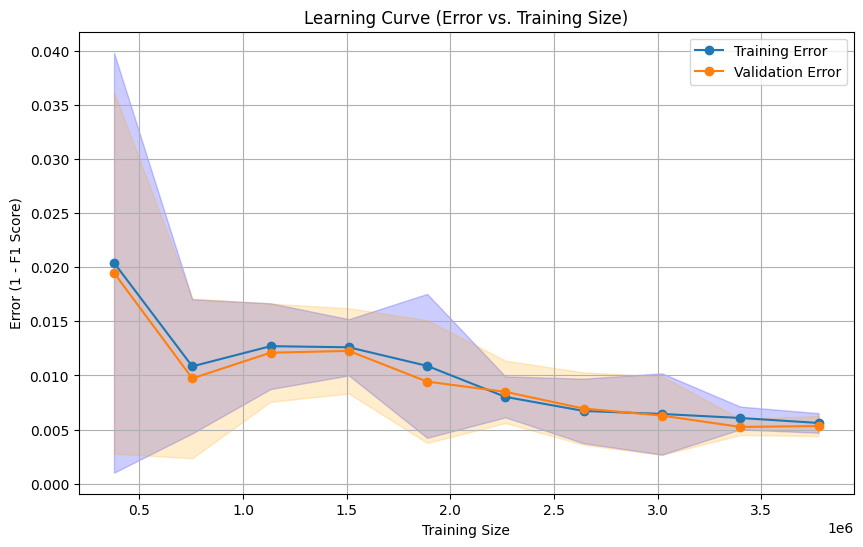

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=random_search.best_estimator_,
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="f1",
)

# Compute mean and standard deviation of errors
train_errors = 1 - np.mean(train_scores, axis=1)
test_errors = 1 - np.mean(test_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
test_errors_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="Training Error", marker='o')
plt.fill_between(
    train_sizes,
    train_errors - train_errors_std,
    train_errors + train_errors_std,
    alpha=0.2,
    color="blue",
)

plt.plot(train_sizes, test_errors, label="Validation Error", marker='o')
plt.fill_between(
    train_sizes,
    test_errors - test_errors_std,
    test_errors + test_errors_std,
    alpha=0.2,
    color="orange",
)

plt.title("Learning Curve (Error vs. Training Size)")
plt.xlabel("Training Size")
plt.ylabel("Error (1 - F1 Score)")
plt.legend(loc="best")
plt.grid()
plt.show()


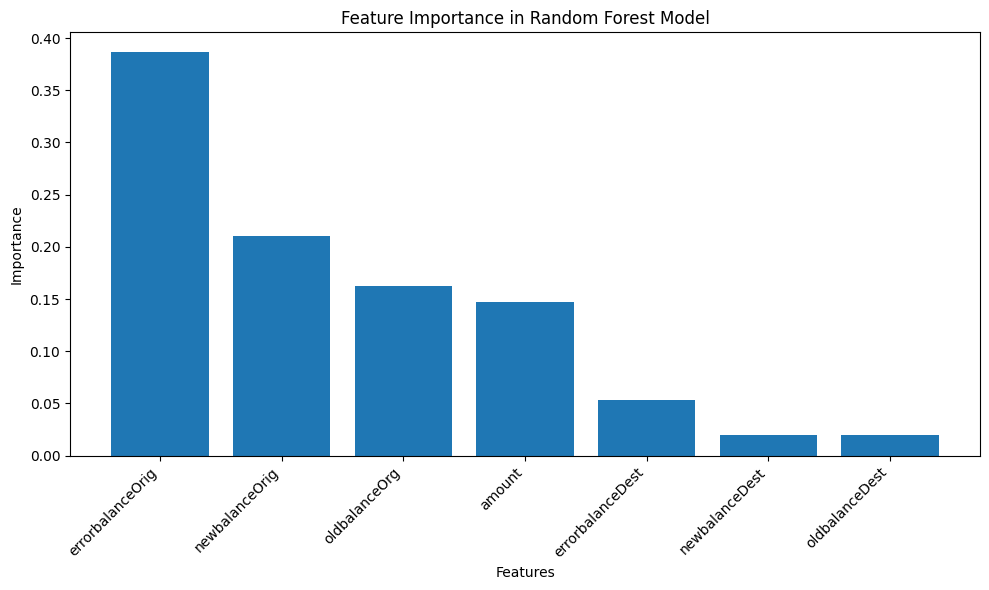


Feature Importances:
         feature  importance
errorbalanceOrig    0.386132
  newbalanceOrig    0.210591
   oldbalanceOrg    0.162828
          amount    0.147096
errorbalanceDest    0.053315
  newbalanceDest    0.020096
  oldbalanceDest    0.019941


In [24]:
# Get the best estimator from your random search
rf_model = random_search.best_estimator_

# Get feature importances
importances = rf_model.feature_importances_

# Assuming you have your feature names in a list called feature_names
# If you don't, you can create it from your X_test_scaled columns
feature_names = X_test.columns 

# Create a DataFrame for better visualization
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame of features and their importance scores
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), feature_importance_df['importance'])
plt.xticks(range(len(importances)), feature_importance_df['feature'], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Print numerical values
print("\nFeature Importances:")
print(feature_importance_df.to_string(index=False))

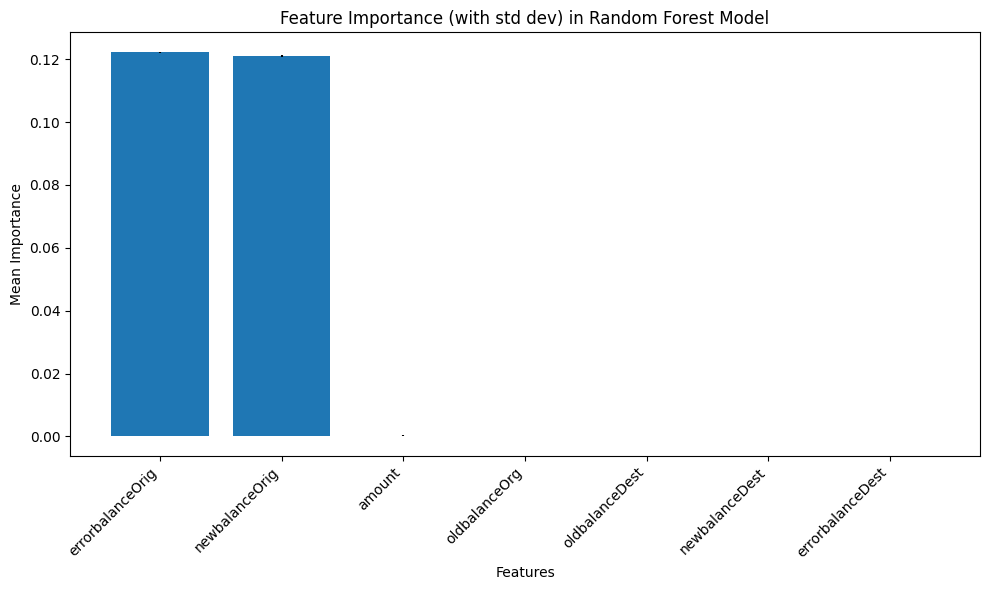


Feature Importances with Standard Deviation:
         feature  importance_mean  importance_std
errorbalanceOrig     1.222313e-01        0.000203
  newbalanceOrig     1.209986e-01        0.000252
          amount     2.710541e-04        0.000010
   oldbalanceOrg     1.016850e-05        0.000006
  oldbalanceDest     5.190172e-06        0.000002
  newbalanceDest     4.236875e-07        0.000002
errorbalanceDest    -2.648047e-06        0.000003


In [25]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calculate permutation importance
result = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create DataFrame with mean importance and standard deviation
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

# Sort by mean importance
feature_importance_df = feature_importance_df.sort_values('importance_mean', ascending=False)

# Plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(result.importances_mean)), 
        feature_importance_df['importance_mean'],
        yerr=feature_importance_df['importance_std'],
        align='center')
plt.xticks(range(len(result.importances_mean)), 
          feature_importance_df['feature'], 
          rotation=45, 
          ha='right')
plt.xlabel('Features')
plt.ylabel('Mean Importance')
plt.title('Feature Importance (with std dev) in Random Forest Model')
plt.tight_layout()
plt.show()

# Print numerical values
print("\nFeature Importances with Standard Deviation:")
print(feature_importance_df.to_string(index=False))

In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation using F1-score as the metric
cv_scores = cross_val_score(random_search.best_estimator_, X, y, cv=cv, scoring='f1', n_jobs=-1)

# Print results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV F1-score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV F1-score: {cv_scores.std():.4f}")

Cross-validation scores: [0.99671053 0.99753695 0.99712526 0.99835796 0.9979483 ]
Average CV F1-score: 0.9975
Standard deviation of CV F1-score: 0.0006


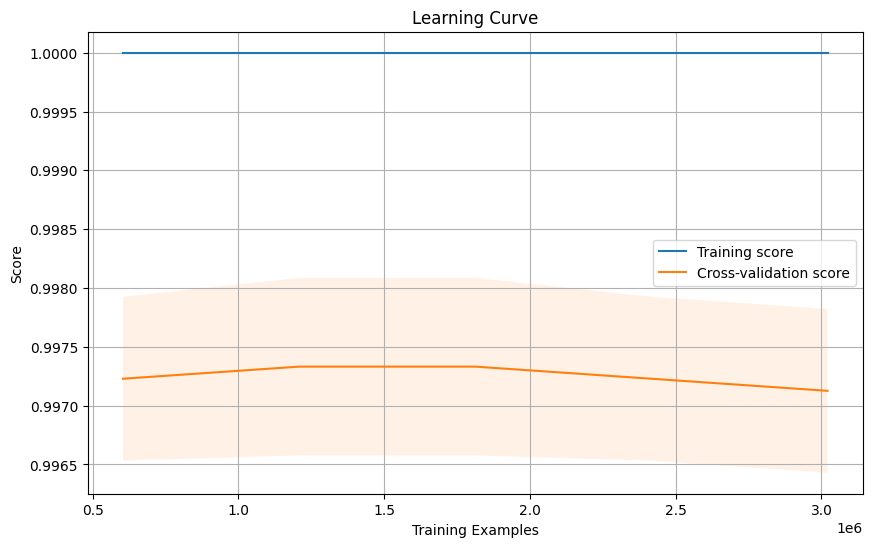

In [44]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.2, 1.0, 5), error_score="f1")
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


plot_learning_curve(rf_classifier, X_train_scaled, y_train, cv=cv)

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure no leakage during preprocessing by fitting only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test data

# Fraud to genuine transaction ratio for class weights
fraud_to_genuine_ratio = 0.001297
class_weight = {0: 1, 1: 1 / fraud_to_genuine_ratio}  # Adjust the weight for the minority class (fraud)

# Step 2: Initialize the Random Forest Classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=8)

# Step 3: Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"F1-Score: {f1:.6f}")
print(f"precision: {precision:.6f}")
print(f"recall: {recall:.6f}")


# Optional: Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


F1-Score: 0.852294
precision: 0.967708
recall: 0.761475
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    409888
         1.0       0.97      0.76      0.85      1220

    accuracy                           1.00    411108
   macro avg       0.98      0.88      0.93    411108
weighted avg       1.00      1.00      1.00    411108



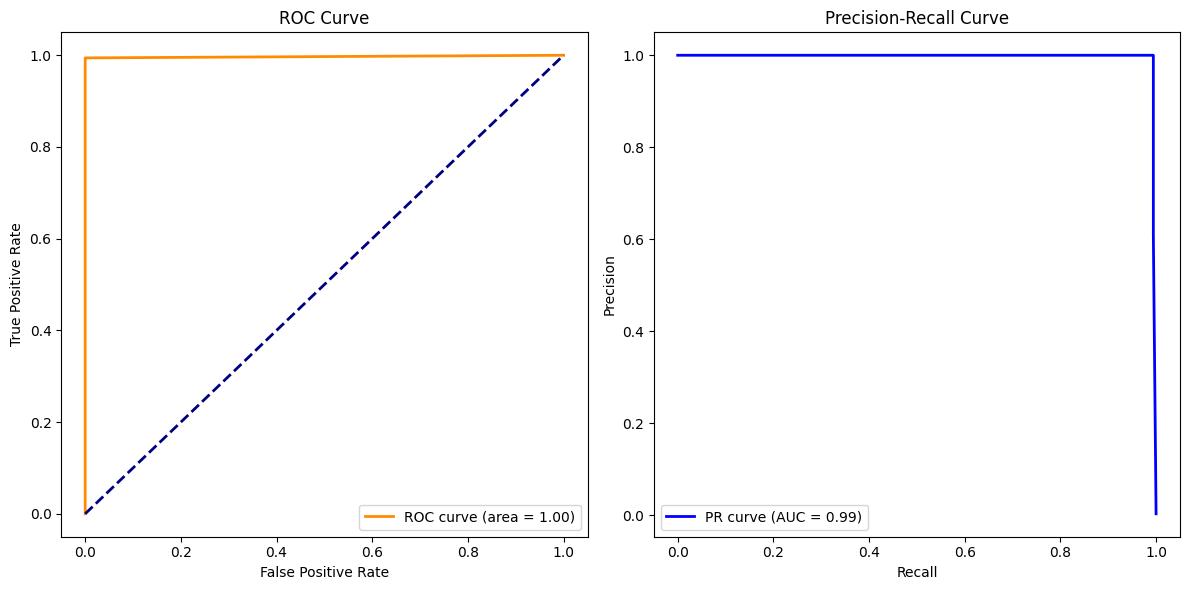

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Step 1: Get prediction probabilities for ROC and PR curves
y_pred_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (fraud)

# Step 2: Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 3: Calculate Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)

# Step 4: Plot ROC Curve
plt.figure(figsize=(12, 6))

# ROC Curve Plot
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# PR Curve Plot
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='b', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Show the plots
plt.tight_layout()
plt.show()


Cross-validation F1-scores: [0.99743195 0.99795082 0.99794872 0.99897436 0.99691675]
Average CV F1-score: 0.9978
Standard deviation of CV F1-score: 0.0007


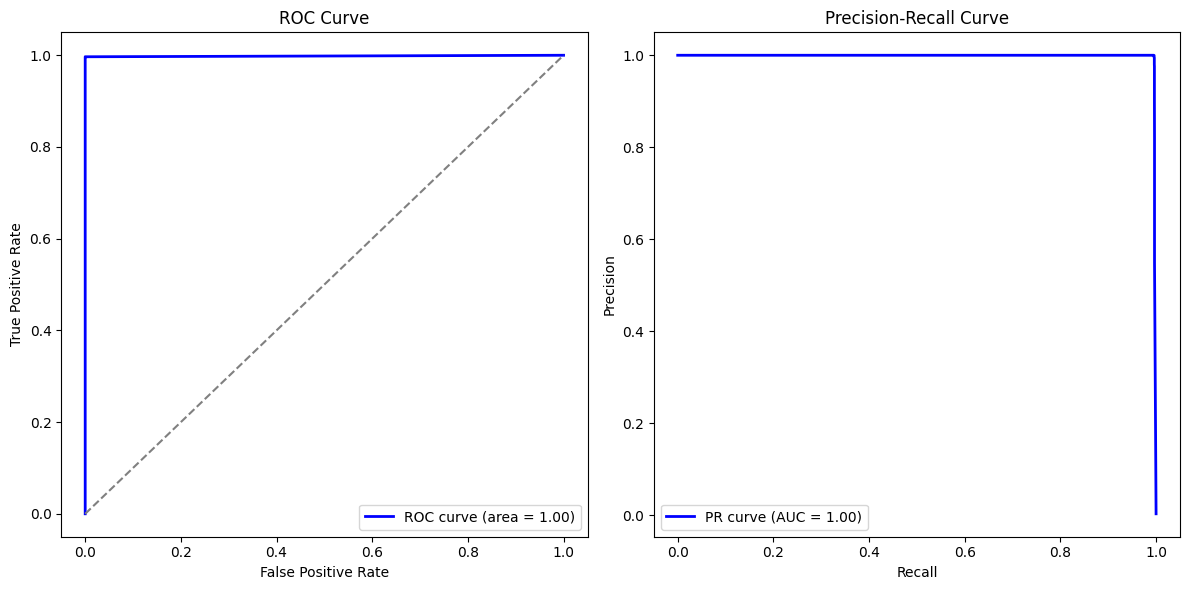

Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    409888
         1.0       1.00      0.99      1.00      1220

    accuracy                           1.00    411108
   macro avg       1.00      1.00      1.00    411108
weighted avg       1.00      1.00      1.00    411108



In [112]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict


skf = StratifiedKFold(n_splits=5)
# Step 3: Cross-validation to calculate F1-scores
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=skf, scoring='f1', n_jobs=8)
print(f"Cross-validation F1-scores: {cv_scores}")
print(f"Average CV F1-score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV F1-score: {cv_scores.std():.4f}")

# Step 4: Use cross_val_predict to get probabilities for ROC and PR curves
y_pred_proba = cross_val_predict(rf_classifier, X_train_scaled, y_train, cv=skf, method='predict_proba', n_jobs=8)

# Get the predicted probabilities for the positive class
y_pred_proba = y_pred_proba[:, 1]

# Step 5: Compute ROC and PR curves
fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
pr_auc = average_precision_score(y_train, y_pred_proba)

# Step 6: Plot the ROC and PR curves
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='b', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Optional: Detailed classification report
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

In [138]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation using F1-score as the metric
cv_scores = cross_val_score(rf_classifier, X, y, cv=cv, scoring='f1', n_jobs=-1)

# Print results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV F1-score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV F1-score: {cv_scores.std():.4f}")


Cross-validation scores: [0.84181055 0.85171455 0.83858998 0.85779607 0.83372365]
Average CV F1-score: 0.8447
Standard deviation of CV F1-score: 0.0088


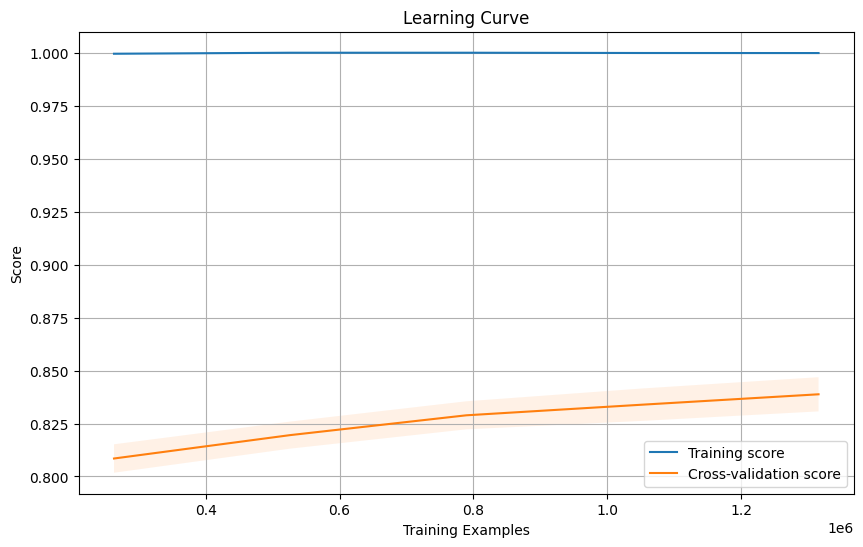

In [140]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.2, 1.0, 5), scoring="f1")
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


plot_learning_curve(rf_classifier, X_train_scaled, y_train, cv=skf)

In [126]:
X_train_scaled.shape, y_train.shape

((1644428, 8), (1315542,))

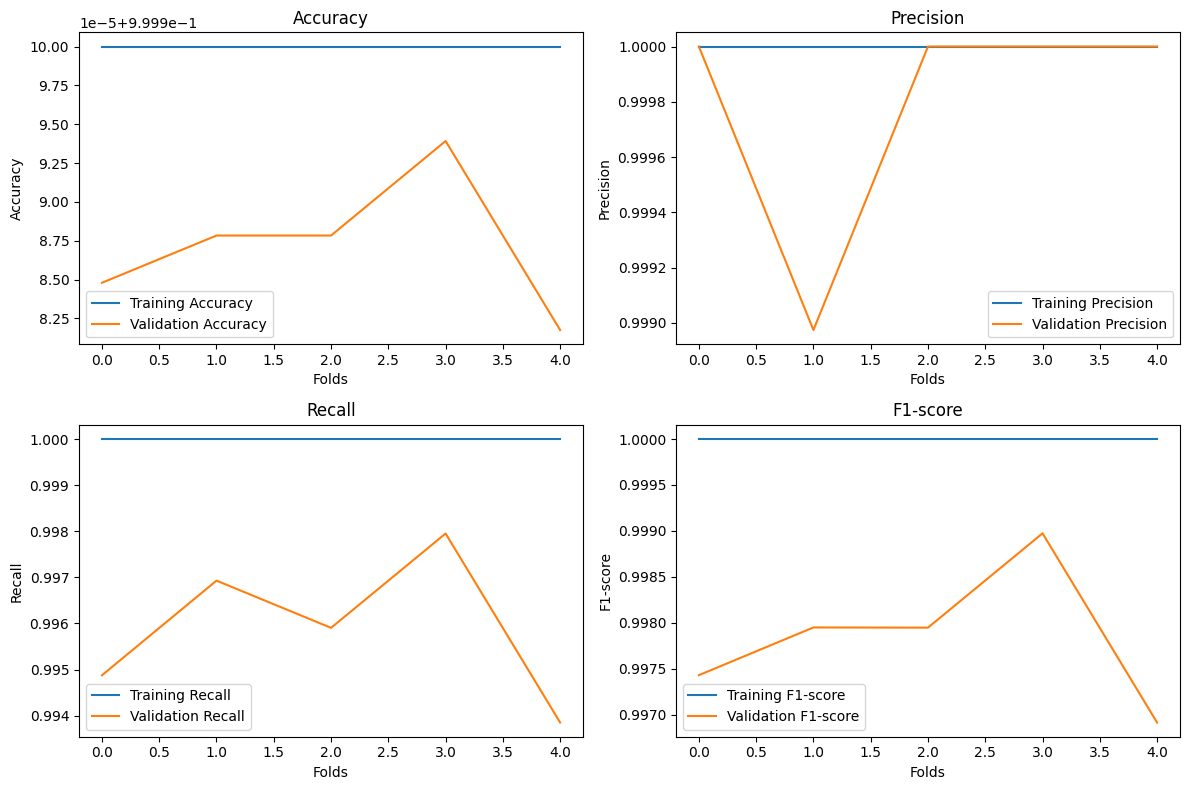

Average Training Accuracy: 1.0000
Average Validation Accuracy: 1.0000
Average Training Precision: 1.0000
Average Validation Precision: 0.9998
Average Training Recall: 1.0000
Average Validation Recall: 0.9959
Average Training F1-score: 1.0000
Average Validation F1-score: 0.9978


In [131]:

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure no leakage during preprocessing by fitting only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test) 


# Convert the NumPy arrays to pandas DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled)
y_train_df = pd.Series(y_train)

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the metrics
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1_scores = []
val_f1_scores = []

# Cross-validation loop
for train_index, val_index in skf.split(X_train_scaled, y_train):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_scaled_df.iloc[train_index], X_train_scaled_df.iloc[val_index]
    y_train_fold, y_val_fold = y_train_df.iloc[train_index], y_train_df.iloc[val_index]
    
    # Train the Random Forest model
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=8)
    rf_classifier.fit(X_train_fold, y_train_fold)
    
    # Training metrics
    y_train_pred = rf_classifier.predict(X_train_fold)
    train_accuracies.append(accuracy_score(y_train_fold, y_train_pred))
    train_precisions.append(precision_score(y_train_fold, y_train_pred))
    train_recalls.append(recall_score(y_train_fold, y_train_pred))
    train_f1_scores.append(f1_score(y_train_fold, y_train_pred))

    # Validation metrics
    y_val_pred = rf_classifier.predict(X_val_fold)
    val_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
    val_precisions.append(precision_score(y_val_fold, y_val_pred))
    val_recalls.append(recall_score(y_val_fold, y_val_pred))
    val_f1_scores.append(f1_score(y_val_fold, y_val_pred))

# Plot the metrics
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
plt.plot(range(len(train_precisions)), train_precisions, label='Training Precision')
plt.plot(range(len(val_precisions)), val_precisions, label='Validation Precision')
plt.xlabel('Folds')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision')

# Recall plot
plt.subplot(2, 2, 3)
plt.plot(range(len(train_recalls)), train_recalls, label='Training Recall')
plt.plot(range(len(val_recalls)), val_recalls, label='Validation Recall')
plt.xlabel('Folds')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall')

# F1-score plot
plt.subplot(2, 2, 4)
plt.plot(range(len(train_f1_scores)), train_f1_scores, label='Training F1-score')
plt.plot(range(len(val_f1_scores)), val_f1_scores, label='Validation F1-score')
plt.xlabel('Folds')
plt.ylabel('F1-score')
plt.legend()
plt.title('F1-score')

plt.tight_layout()
plt.show()

# Calculate average metrics across all folds
print(f"Average Training Accuracy: {sum(train_accuracies)/len(train_accuracies):.4f}")
print(f"Average Validation Accuracy: {sum(val_accuracies)/len(val_accuracies):.4f}")
print(f"Average Training Precision: {sum(train_precisions)/len(train_precisions):.4f}")
print(f"Average Validation Precision: {sum(val_precisions)/len(val_precisions):.4f}")
print(f"Average Training Recall: {sum(train_recalls)/len(train_recalls):.4f}")
print(f"Average Validation Recall: {sum(val_recalls)/len(val_recalls):.4f}")
print(f"Average Training F1-score: {sum(train_f1_scores)/len(train_f1_scores):.4f}")
print(f"Average Validation F1-score: {sum(val_f1_scores)/len(val_f1_scores):.4f}")
